In [1]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
import pandas as pd
import numpy as np
import statistics as st

In [2]:
file_path=r"C:\\Users\\lehri\\Documents\\GitHub\\dust_solar_power\\"
file_ghi_2019=file_path+"NREL_NSRDB\GHI_CAMS49_2019.csv"
file_ghi_2020=file_path+"NREL_NSRDB\GHI_CAMS49_2020.csv"
file_ghi_2021=file_path+"NREL_NSRDB\GHI_CAMS49_2021.csv"

ghi_2019=pd.read_csv(file_ghi_2019, header=[2], engine="python")
ghi_2020=pd.read_csv(file_ghi_2020, header=[2], engine="python")
ghi_2021=pd.read_csv(file_ghi_2021, header=[2], engine="python")
ghi_df = pd.concat([ghi_2019, ghi_2020, ghi_2021], ignore_index=True)
ghi_df_header=pd.read_csv(file_ghi_2019, engine="python", nrows=1)
ghi_df['Datetime']= pd.to_datetime(ghi_df['Year'].astype(str) + '-' + ghi_df['Month'].astype(str) + '-' + ghi_df['Day'].astype(str) + '-' + ghi_df['Hour'].astype(str), format='%Y-%m-%d-%H')
ghi_df.set_index('Datetime', inplace=True)

In [3]:
wind_df_2019=ghi_df[ghi_df['Year']==2019]['Wind Speed']
wind_df_2020=ghi_df[ghi_df['Year']==2020]['Wind Speed']
wind_df_2021=ghi_df[ghi_df['Year']==2021]['Wind Speed']

#wind_range4 = wind_df.loc[(wind_df['Wind Speed'] >= 11) & (wind_df['Wind Speed'] < 14), 'Wind Direction']
#wind_range3 = wind_df.loc[(wind_df['Wind Speed'] >= 8) & (wind_df['Wind Speed'] < 11), 'Wind Direction']
#wind_range2 = wind_df.loc[(wind_df['Wind Speed'] >= 5) & (wind_df['Wind Speed'] < 8), 'Wind Direction']
#wind_range1 = wind_df.loc[(wind_df['Wind Speed'] < 5), 'Wind Direction']

In [4]:
wind_df_2019.reset_index()['Wind Speed'].corr(wind_df_2021.reset_index()['Wind Speed'])

0.2816442896931675

In [5]:
%store wind_df_2019
%store wind_df_2020
%store wind_df_2021


Stored 'wind_df_2019' (Series)
Stored 'wind_df_2020' (Series)
Stored 'wind_df_2021' (Series)


In [18]:
wind_df_2019_sampled=wind_df_2019.resample('ME').mean().reset_index()
wind_df_2020_sampled=wind_df_2020.resample('ME').mean().reset_index()
wind_df_2021_sampled=wind_df_2021.resample('ME').mean().reset_index()

wind_df_2019_std=wind_df_2019.resample('ME').std().reset_index()
wind_df_2020_std=wind_df_2020.resample('ME').std().reset_index()
wind_df_2021_std=wind_df_2021.resample('ME').std().reset_index()



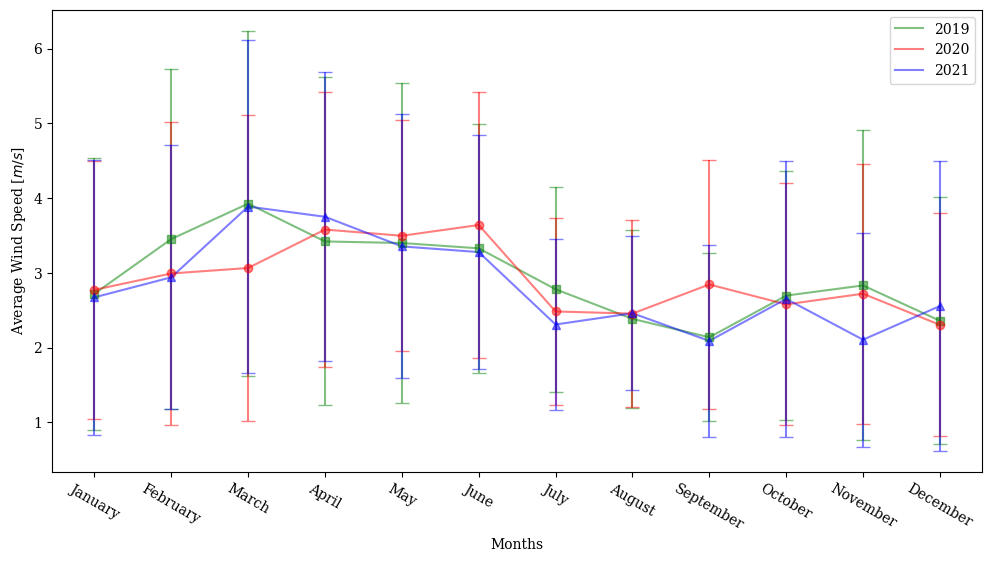

In [35]:
import calendar
fig,ax=plt.subplots(figsize=(12,6))
ax.set_ylabel("Average Wind Speed [$m/s$]")
ax.set_xlabel("Months")
ax.errorbar(list(range(wind_df_2019_sampled['Wind Speed'].size)),wind_df_2019_sampled['Wind Speed'].values.flatten(),wind_df_2019_std['Wind Speed'].values.flatten(),color='green',alpha=0.5, capsize=5, fmt='s')   
ax.errorbar(list(range(wind_df_2020_sampled['Wind Speed'].size)),wind_df_2020_sampled['Wind Speed'].values.flatten(),wind_df_2020_std['Wind Speed'].values.flatten(),color='red',alpha=0.5, capsize=5, fmt='o')   
ax.errorbar(list(range(wind_df_2021_sampled['Wind Speed'].size)),wind_df_2021_sampled['Wind Speed'].values.flatten(),wind_df_2021_std['Wind Speed'].values.flatten(),color='blue',alpha=0.5, capsize=5, fmt='^')   

ax.plot(wind_df_2019_sampled['Wind Speed'].values.flatten(),color='green',alpha=0.5,label='2019')   
ax.plot(wind_df_2020_sampled['Wind Speed'].values.flatten(),color='red',alpha=0.5,label='2020')   
ax.plot(wind_df_2021_sampled['Wind Speed'].values.flatten(),color='blue',alpha=0.5 ,label='2021')   

ax.set_xticks( np.arange(12), calendar.month_name[1:13], rotation=330 )
ax.legend()

In [8]:
def plot_windrose(df,year):
    '''
    The code used in this function, specifically for getting the same percentages on the wind rose rings for every year 
    was found in a comment by user "Acortiz" in the following blog post 
    https://dwikita-ichsana.medium.com/meteorology-101-how-to-plot-windrose-e42f068a1bca

    '''
    wind_df=df[df['Year']==year]
    N = 3 #how many circles do you want?
    rmax = 15 #maximum percentage value for outer circle
    radii = np.linspace(0, rmax, N + 1)
    if rmax % N == 0:
        fmt = "%d"
    else:
        fmt = "%.1f"
    radii_labels = [fmt % r for r in radii]
    #aws1 is the handle returned from the windrose plot
    
    new_labels = ["E", "N-E", "N", "N-W", "W", "S-W", "S", "S-E"]
    aws1 = WindroseAxes.from_ax(theta_labels=new_labels)
    aws1.bar(wind_df['Wind Direction'], wind_df['Wind Speed'], normed=True, bins=np.arange(0, 10, 2))
    aws1.set_legend(title = 'Wind Speed in m/s', loc='center right', bbox_to_anchor=(1,0.8))
    
    aws1.set_rgrids(
    radii=radii[1:], labels=radii_labels[1:],
    angle=aws1.radii_angle+180,zorder=-1)
    aws1.axes.grid(linestyle='--')
    aws1.axes.set_axisbelow(True)
    aws1.set_title(label=f"Wind Rose Socorro Hueco {year}",loc='center',fontsize=18)

def plot_windrose_month(df_year,month):
    '''
    The code used in this function, specifically for getting the same percentages on the wind rose rings for every year 
    was found in a comment by user "Acortiz" in the following blog post 
    https://dwikita-ichsana.medium.com/meteorology-101-how-to-plot-windrose-e42f068a1bca

    '''
    wind_df=df_year[df_year['Month']==month]
    N = 3 #how many circles do you want?
    rmax = 15 #maximum percentage value for outer circle
    radii = np.linspace(0, rmax, N + 1)
    if rmax % N == 0:
        fmt = "%d"
    else:
        fmt = "%.1f"
    radii_labels = [fmt % r for r in radii]
    #aws1 is the handle returned from the windrose plot
    
    new_labels = ["E", "N-E", "N", "N-W", "W", "S-W", "S", "S-E"]
    aws1 = WindroseAxes.from_ax(theta_labels=new_labels)
    aws1.bar(wind_df['Wind Direction'], wind_df['Wind Speed'], normed=True, bins=np.arange(0, 10, 2))
    aws1.set_legend(title = 'Wind Speed in m/s', loc='center right', bbox_to_anchor=(1,0.8))
    
    aws1.set_rgrids(
    radii=radii[1:], labels=radii_labels[1:],
    angle=aws1.radii_angle+180,zorder=-1)
    aws1.axes.grid(linestyle='--')
    aws1.axes.set_axisbelow(True)
    aws1.set_title(label=f"Wind Rose Socorro Hueco {month}",loc='center',fontsize=18)
    

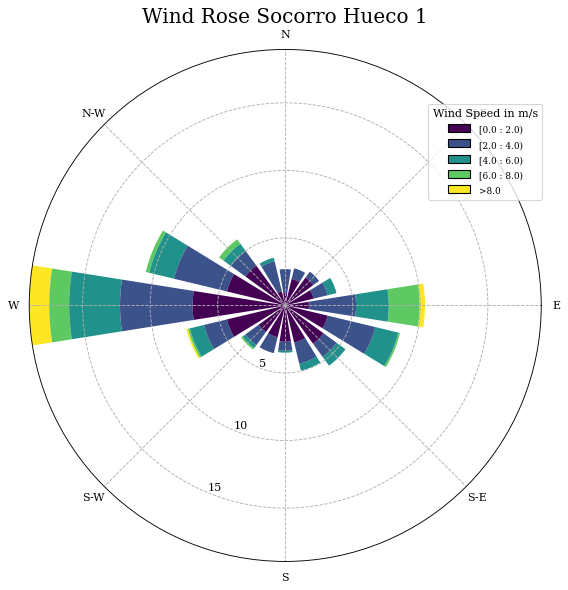

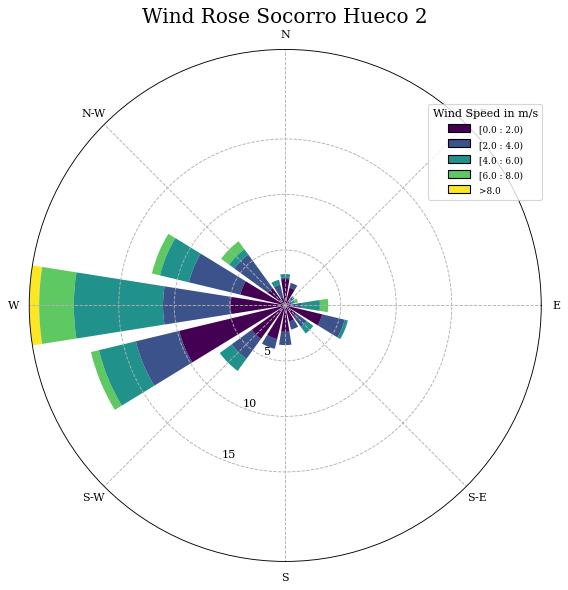

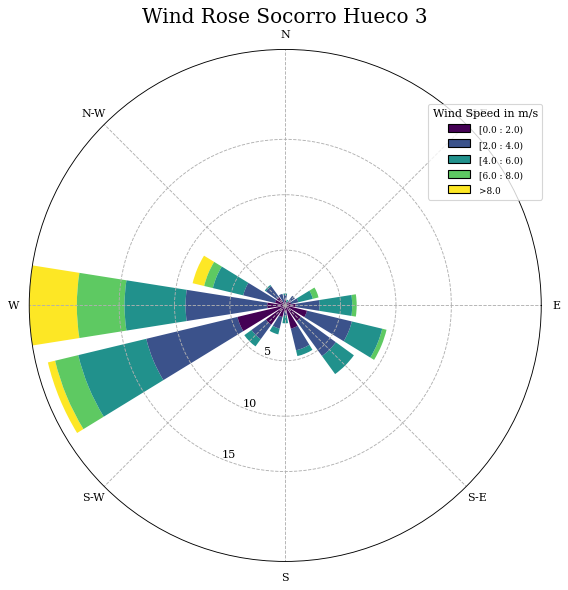

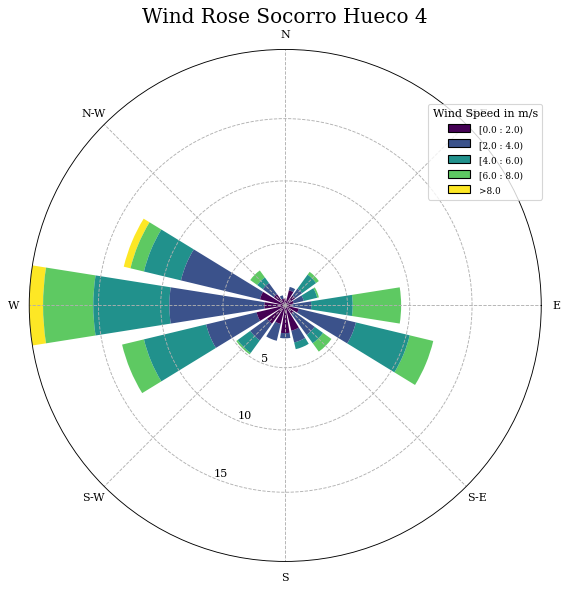

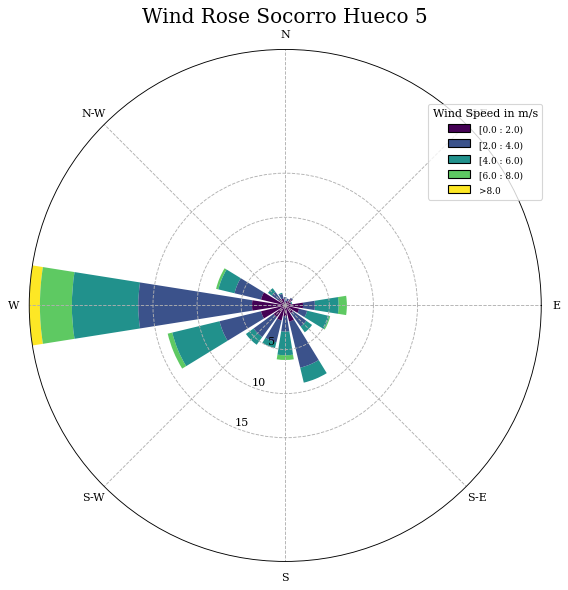

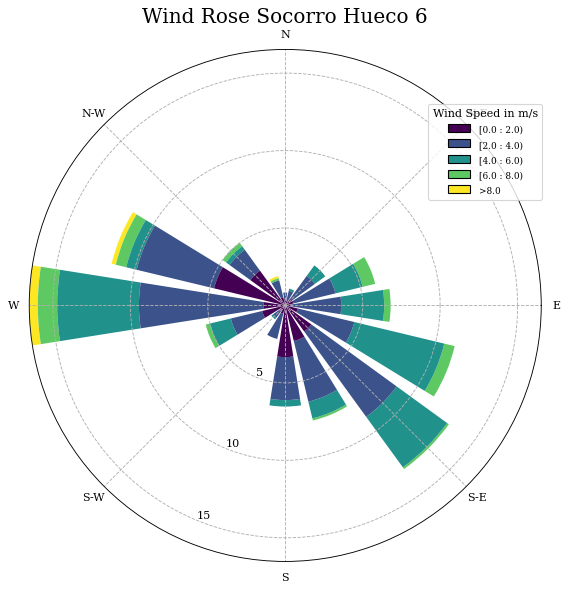

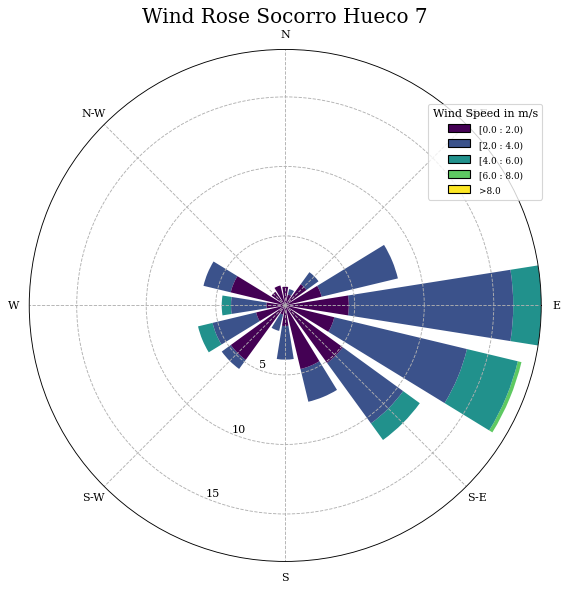

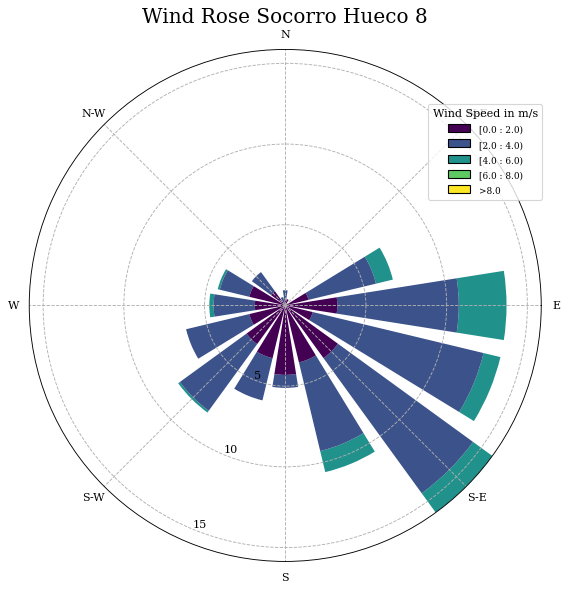

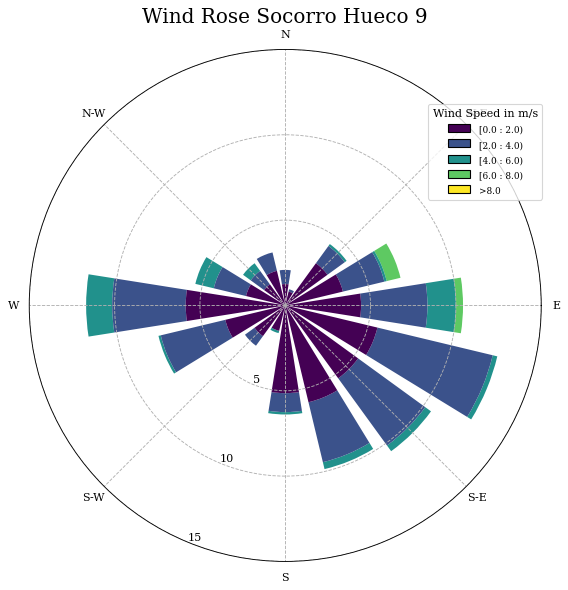

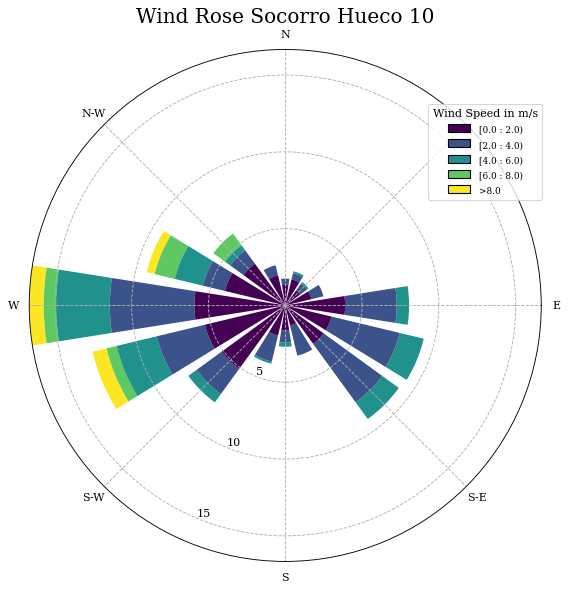

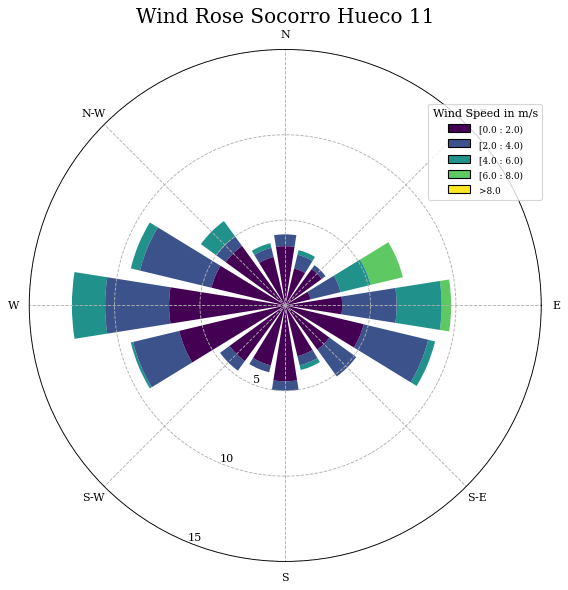

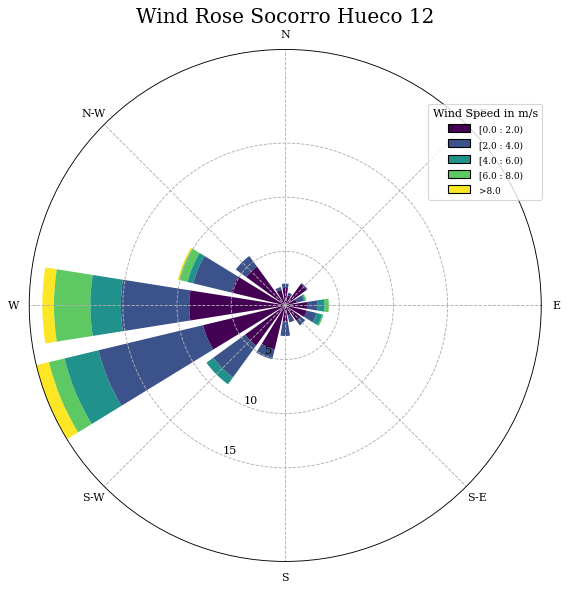

In [9]:
wind_df_year=ghi_df[ghi_df['Year']==2021]
for month in range(1,13):
    plot_windrose_month(wind_df_year,month)

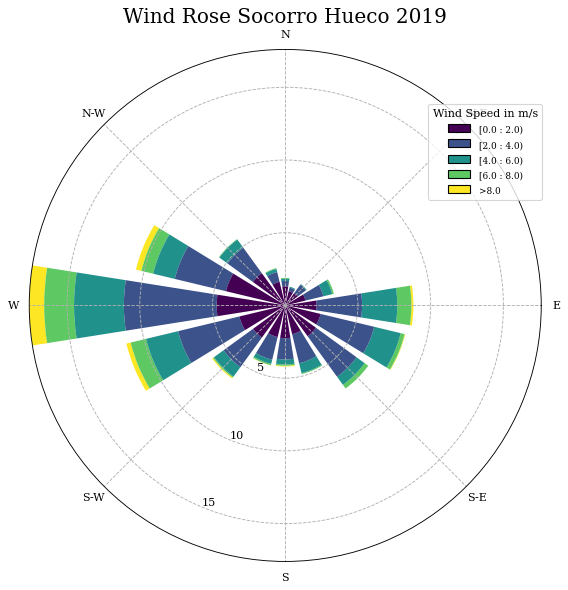

In [10]:
plot_windrose(ghi_df, 2019)

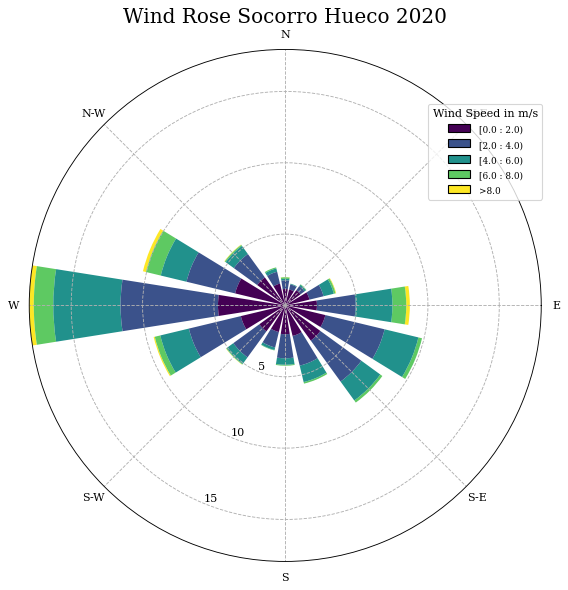

In [11]:
plot_windrose(ghi_df, 2020)

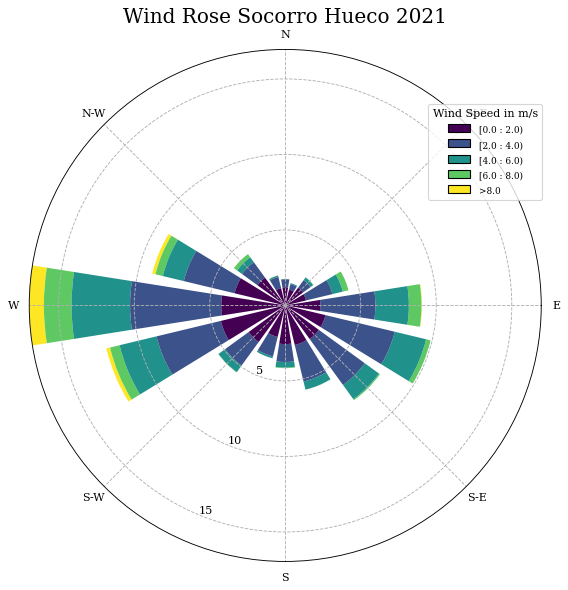

In [12]:
plot_windrose(ghi_df, 2021)